**Linear Classifier Pure Tensorflow**

In [ ]:
import numpy as np

Create linearly-separable data: two classes of points

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

Stack in one array

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Create target lables : -1 and 1

In [ ]:
targets = np.vstack((np.full((num_samples_per_class, 1), -1.0),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

Show data

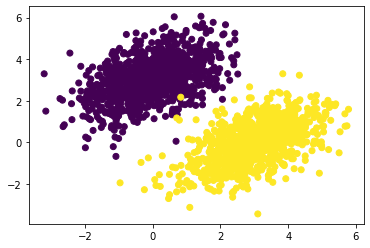

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Creating variables w and b

In [ ]:
import tensorflow as tf

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

Forward pass

In [ ]:
def model(input):
  return tf.matmul(input, W) + b

SVM LOSS(Hinge loss)

In [ ]:
def svm_loss(predictions, targets):
  l2_norm = tf.reduce_sum(tf.square(W))
  alpha = tf.constant([0.1])
  classification_term = tf.reduce_mean(tf.maximum(0.,tf.subtract(1., tf.multiply(predictions, targets))))
  loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
  return loss

Training step

In [ ]:
learning_rate = 0.1

def training_step(inputs, target):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = svm_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


Batch training loop

In [ ]:
for step in range(30):
  loss = training_step(inputs, targets)
  print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.1918
Loss at step 1: 0.1238
Loss at step 2: 0.1090
Loss at step 3: 0.1018
Loss at step 4: 0.0981
Loss at step 5: 0.0961
Loss at step 6: 0.0947
Loss at step 7: 0.0936
Loss at step 8: 0.0930
Loss at step 9: 0.0925
Loss at step 10: 0.0921
Loss at step 11: 0.0918
Loss at step 12: 0.0916
Loss at step 13: 0.0915
Loss at step 14: 0.0914
Loss at step 15: 0.0913
Loss at step 16: 0.0913
Loss at step 17: 0.0912
Loss at step 18: 0.0912
Loss at step 19: 0.0911
Loss at step 20: 0.0911
Loss at step 21: 0.0910
Loss at step 22: 0.0910
Loss at step 23: 0.0910
Loss at step 24: 0.0910
Loss at step 25: 0.0910
Loss at step 26: 0.0910
Loss at step 27: 0.0910
Loss at step 28: 0.0910
Loss at step 29: 0.0910


Predictions on the training set

In [ ]:
predictions = model(inputs)


Visualize

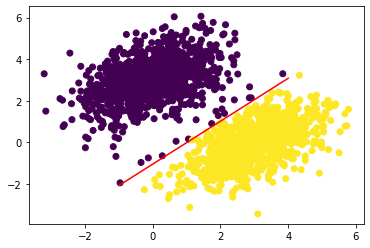

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)